In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read csv files
hero_df = pd.read_csv('./dataset/heroes_may_25_2024.csv', index_col=0)
hero_stats_df = pd.read_csv('./dataset/hero_stats_may_25_2024.csv', index_col=0)
hero_game_duration_df = pd.read_csv('./dataset/hero_game_duration_may_25_2024.csv', index_col=0)

display(hero_df.head(), 
        hero_stats_df.head(),
        hero_game_duration_df.head())


,id,name,localized_name,primary_attr,attack_type,legs,role_escape,role_pusher,role_disabler,role_initiator,role_durable,role_carry,role_support,role_nuker
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,2,1,0,0,0,0,1,0,1
1,2,npc_dota_hero_axe,Axe,str,Melee,2,0,0,1,1,1,1,0,0
2,3,npc_dota_hero_bane,Bane,all,Ranged,4,0,0,1,0,1,0,1,1
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,2,0,0,1,1,0,1,0,1
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,2,0,0,1,0,0,0,1,1


,id,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_mr,base_attack_min,base_attack_max,base_str,...,7_win,8_pick,8_win,turbo_picks,turbo_wins,pro_pick,pro_win,pro_ban,pub_pick,pub_win
0,1,120,0.75,75,0.0,1,25,29,33,19,...,13732,13198,6519,241581,123901,150,71,283,494559,250815
1,2,120,2.50,75,0.0,0,25,30,34,25,...,20406,16200,8660,373879,210043,281,156,309,664033,366899
2,3,120,0.25,75,0.0,1,25,-1,5,23,...,8276,12375,6425,104164,50573,221,106,316,192845,96812
3,4,120,0.25,75,0.0,2,25,35,41,24,...,4476,3494,1758,166841,80502,95,51,107,185626,93449
4,5,120,0.25,75,0.0,0,25,30,36,17,...,11910,11541,5884,270125,140765,268,141,59,453308,235028


,duration_bin,games_played,wins,hero_id
0,5700,1,0,1
1,3300,285,147,1
2,7500,1,0,1
3,1800,2332,1162,1
4,3900,48,26,1


In [2]:
# hero df summary statistic
display(hero_df.info(), hero_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 0 to 123
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              124 non-null    int64 
 1   name            124 non-null    object
 2   localized_name  124 non-null    object
 3   primary_attr    124 non-null    object
 4   attack_type     124 non-null    object
 5   legs            124 non-null    int64 
 6   role_escape     124 non-null    int64 
 7   role_pusher     124 non-null    int64 
 8   role_disabler   124 non-null    int64 
 9   role_initiator  124 non-null    int64 
 10  role_durable    124 non-null    int64 
 11  role_carry      124 non-null    int64 
 12  role_support    124 non-null    int64 
 13  role_nuker      124 non-null    int64 
dtypes: int64(10), object(4)
memory usage: 14.5+ KB


None

,id,legs,role_escape,role_pusher,role_disabler,role_initiator,role_durable,role_carry,role_support,role_nuker
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,64.056452,2.064516,0.411290,0.233871,0.741935,0.443548,0.395161,0.572581,0.370968,0.709677
std,37.476779,1.166901,0.494064,0.425008,0.439345,0.498818,0.490869,0.496711,0.485024,0.455753
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.750000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.500000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,94.250000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,138.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# hero stats summary statistic
display(hero_stats_df.info(), hero_stats_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 0 to 123
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 124 non-null    int64  
 1   base_health        124 non-null    int64  
 2   base_health_regen  124 non-null    float64
 3   base_mana          124 non-null    int64  
 4   base_mana_regen    124 non-null    float64
 5   base_armor         124 non-null    int64  
 6   base_mr            124 non-null    int64  
 7   base_attack_min    124 non-null    int64  
 8   base_attack_max    124 non-null    int64  
 9   base_str           124 non-null    int64  
 10  base_agi           124 non-null    int64  
 11  base_int           124 non-null    int64  
 12  str_gain           124 non-null    float64
 13  agi_gain           124 non-null    float64
 14  int_gain           124 non-null    float64
 15  attack_range       124 non-null    int64  
 16  projectile_speed   124 non-null

None

,id,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_mr,base_attack_min,base_attack_max,base_str,...,7_win,8_pick,8_win,turbo_picks,turbo_wins,pro_pick,pro_win,pro_ban,pub_pick,pub_win
count,124.000000,124.0,124.000000,124.000000,124.000000,124.000000,124.0,124.000000,124.000000,124.000000,...,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,64.056452,120.0,0.614919,74.758065,0.125806,0.572581,25.0,21.540323,28.032258,21.241935,...,8493.991935,8270.000000,4135.000000,196044.032258,98022.056452,156.669355,78.322581,182.000000,288774.274194,144387.112903
std,37.476779,0.0,0.623392,7.882646,0.223287,1.350540,0.0,12.013136,12.427962,3.427225,...,5046.133378,4590.010725,2375.859334,121723.398904,63320.013693,84.484253,44.067123,131.595586,174878.507644,90834.680533
min,1.000000,120.0,-0.250000,0.000000,0.000000,-2.000000,25.0,-5.000000,-1.000000,0.000000,...,1190.000000,1565.000000,725.000000,32509.000000,13500.000000,37.000000,14.000000,19.000000,30345.000000,13530.000000
25%,32.750000,120.0,0.250000,75.000000,0.000000,0.000000,25.0,11.250000,18.750000,19.000000,...,4881.000000,4609.500000,2367.500000,114584.000000,53981.500000,89.750000,46.000000,84.250000,159383.750000,77146.500000
50%,63.500000,120.0,0.250000,75.000000,0.000000,0.000000,25.0,24.000000,31.000000,21.000000,...,7857.000000,7789.500000,3847.500000,163514.500000,80058.000000,143.000000,69.500000,152.500000,247088.500000,119111.000000
75%,94.250000,120.0,1.000000,75.000000,0.250000,1.000000,25.0,29.000000,36.000000,23.000000,...,11160.750000,11044.000000,5527.250000,256045.000000,129883.500000,213.000000,104.500000,254.000000,398025.000000,196382.250000
max,138.000000,120.0,4.000000,120.000000,1.000000,5.000000,25.0,60.000000,68.000000,30.000000,...,30512.000000,26087.000000,13122.000000,766553.000000,398390.000000,414.000000,213.000000,737.000000,981064.000000,509302.000000


In [4]:
# rename rank columns
hero_stats_renamed_cols = {'1_pick':'herald_picks', '1_win':'herald_wins',
                           '2_pick':'guardian_picks', '2_win':'guardian_wins',
                           '3_pick':'crusader_picks', '3_win':'crusader_wins',
                           '4_pick':'archon_picks', '4_win':'archon_wins',
                           '5_pick':'legend_picks', '5_win':'legend_wins',
                           '6_pick':'ancient_picks', '6_win':'ancient_wins',
                           '7_pick':'divine_picks', '7_win':'divine_wins',
                           '8_pick':'immortal_picks', '8_win':'immortal_wins'}

hero_stats_df = hero_stats_df.rename(columns=hero_stats_renamed_cols)
hero_stats_df.head()

,id,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_mr,base_attack_min,base_attack_max,base_str,...,divine_wins,immortal_picks,immortal_wins,turbo_picks,turbo_wins,pro_pick,pro_win,pro_ban,pub_pick,pub_win
0,1,120,0.75,75,0.0,1,25,29,33,19,...,13732,13198,6519,241581,123901,150,71,283,494559,250815
1,2,120,2.50,75,0.0,0,25,30,34,25,...,20406,16200,8660,373879,210043,281,156,309,664033,366899
2,3,120,0.25,75,0.0,1,25,-1,5,23,...,8276,12375,6425,104164,50573,221,106,316,192845,96812
3,4,120,0.25,75,0.0,2,25,35,41,24,...,4476,3494,1758,166841,80502,95,51,107,185626,93449
4,5,120,0.25,75,0.0,0,25,30,36,17,...,11910,11541,5884,270125,140765,268,141,59,453308,235028


In [5]:
# hero_df and hero_stats_df can be merged together
# remove similar columns before merging
dup_cols = set(hero_df.columns) & set(hero_stats_df.columns)
dup_cols = [col for col in list(dup_cols) if col != 'id']
hero_stats_df = hero_stats_df.drop(columns=dup_cols, axis=1)

# merge hero_df and hero_stats_df
main_hero_df = hero_df.merge(hero_stats_df, how='inner', on='id')
main_hero_df.head()

,id,name,localized_name,primary_attr,attack_type,legs,role_escape,role_pusher,role_disabler,role_initiator,...,divine_wins,immortal_picks,immortal_wins,turbo_picks,turbo_wins,pro_pick,pro_win,pro_ban,pub_pick,pub_win
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,2,1,0,0,0,...,13732,13198,6519,241581,123901,150,71,283,494559,250815
1,2,npc_dota_hero_axe,Axe,str,Melee,2,0,0,1,1,...,20406,16200,8660,373879,210043,281,156,309,664033,366899
2,3,npc_dota_hero_bane,Bane,all,Ranged,4,0,0,1,0,...,8276,12375,6425,104164,50573,221,106,316,192845,96812
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,2,0,0,1,1,...,4476,3494,1758,166841,80502,95,51,107,185626,93449
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,2,0,0,1,0,...,11910,11541,5884,270125,140765,268,141,59,453308,235028


In [6]:
main_hero_df.columns

Index(['id', 'name', 'localized_name', 'primary_attr', 'attack_type', 'legs',
       'role_escape', 'role_pusher', 'role_disabler', 'role_initiator',
       'role_durable', 'role_carry', 'role_support', 'role_nuker',
       'base_health', 'base_health_regen', 'base_mana', 'base_mana_regen',
       'base_armor', 'base_mr', 'base_attack_min', 'base_attack_max',
       'base_str', 'base_agi', 'base_int', 'str_gain', 'agi_gain', 'int_gain',
       'attack_range', 'projectile_speed', 'attack_rate', 'base_attack_time',
       'attack_point', 'move_speed', 'turn_rate', 'cm_enabled', 'day_vision',
       'night_vision', 'herald_picks', 'herald_wins', 'guardian_picks',
       'guardian_wins', 'crusader_picks', 'crusader_wins', 'archon_picks',
       'archon_wins', 'legend_picks', 'legend_wins', 'ancient_picks',
       'ancient_wins', 'divine_picks', 'divine_wins', 'immortal_picks',
       'immortal_wins', 'turbo_picks', 'turbo_wins', 'pro_pick', 'pro_win',
       'pro_ban', 'pub_pick', 'pub_win

In [7]:
mask = (main_hero_df['base_armor'] < 0) | (main_hero_df['base_attack_max'] < 0)
base_cols = ['id', 'localized_name', 'primary_attr', 'base_armor', 'base_attack_min', 
             'base_attack_max', 'base_health', 'base_health_regen', 'base_mana', 'base_mana_regen', 
             'base_mr', 'base_int', 'int_gain', 'base_str', 'str_gain', 'base_agi', 'agi_gain']

main_hero_df[mask][base_cols]

,id,localized_name,primary_attr,base_armor,base_attack_min,base_attack_max,base_health,base_health_regen,base_mana,base_mana_regen,base_mr,base_int,int_gain,base_str,str_gain,base_agi,agi_gain
8,9,Mirana,all,-2,-5,-1,120,0.25,75,0.40,25,22,1.4,20,1.7,24,2.5
9,10,Morphling,agi,-2,9,18,120,0.50,75,0.50,25,19,1.8,23,3.2,24,3.9
17,18,Sven,str,-1,37,39,120,0.75,75,0.00,25,16,1.5,22,3.2,21,2.2
29,31,Lich,int,-1,24,33,120,0.50,75,0.75,25,26,3.8,20,2.1,17,2.0
33,35,Sniper,agi,-1,13,19,120,0.25,75,0.00,25,15,2.6,19,2.0,27,3.2
36,38,Beastmaster,all,-1,5,9,120,0.25,75,0.00,25,16,1.2,25,2.9,22,1.6
40,42,Wraith King,str,-1,38,40,120,0.50,75,0.00,25,18,1.6,22,2.8,16,1.7
45,47,Viper,agi,-2,27,29,120,0.25,75,0.00,25,17,2.0,21,2.4,21,2.7
59,61,Broodmother,all,-1,9,15,120,0.25,75,0.00,25,18,1.4,19,2.3,18,2.6
64,66,Chen,all,-1,9,16,120,0.25,75,0.50,25,19,3.2,23,2.0,15,2.1


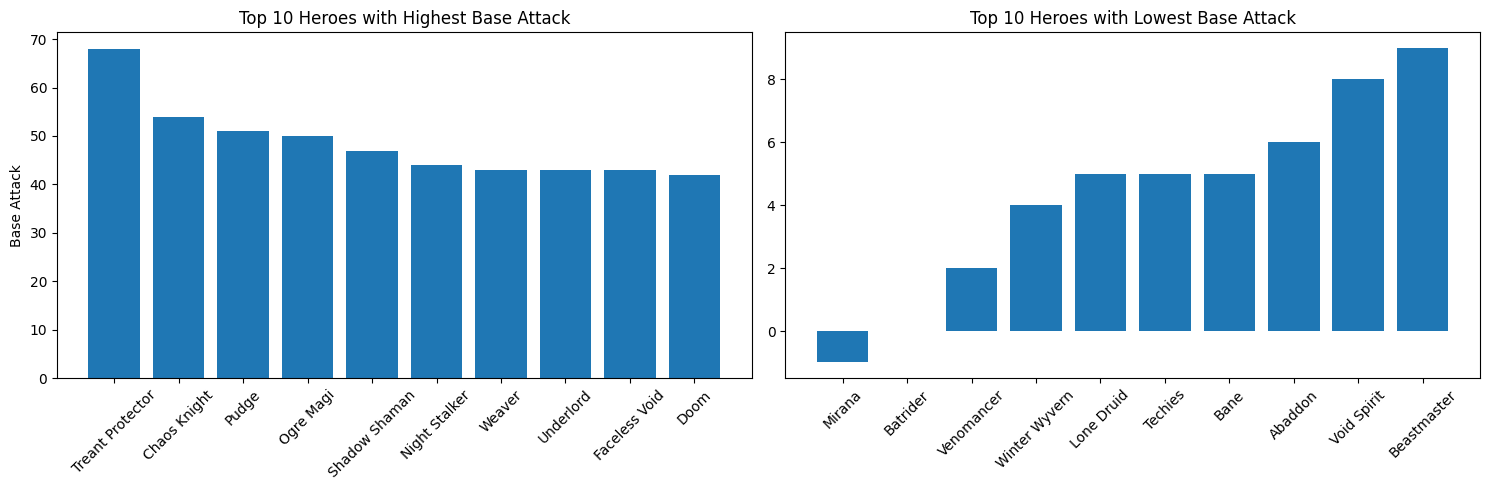

In [8]:
# top 10 heroes with highest base attack
high_base_attack_10 = main_hero_df[['id', 'localized_name', 'primary_attr', 'attack_type', 'base_attack_max']] \
                        .sort_values('base_attack_max', ascending=False).head(10)

# top 10 heroes with lowest base attack
low_base_attack_10 = main_hero_df[['id', 'localized_name', 'primary_attr', 'attack_type', 'base_attack_max']] \
                        .sort_values('base_attack_max', ascending=True).head(10)

# plot bar graph side-by-side
fig, ax = plt.subplots(nrows=1 ,ncols=2, figsize=(15,5))
ax[0].bar(x='localized_name', height='base_attack_max', data=high_base_attack_10)
ax[1].bar(x='localized_name', height='base_attack_max', data=low_base_attack_10)

# set title
ax[0].set_title('Top 10 Heroes with Highest Base Attack')
ax[1].set_title('Top 10 Heroes with Lowest Base Attack')

# label y-axis
ax[0].set_ylabel('Base Attack')

# adjust x-axis ticks
ax[0].tick_params(axis='x', labelrotation=45)
ax[1].tick_params(axis='x', labelrotation=45)

# show plot
plt.tight_layout()
plt.show()

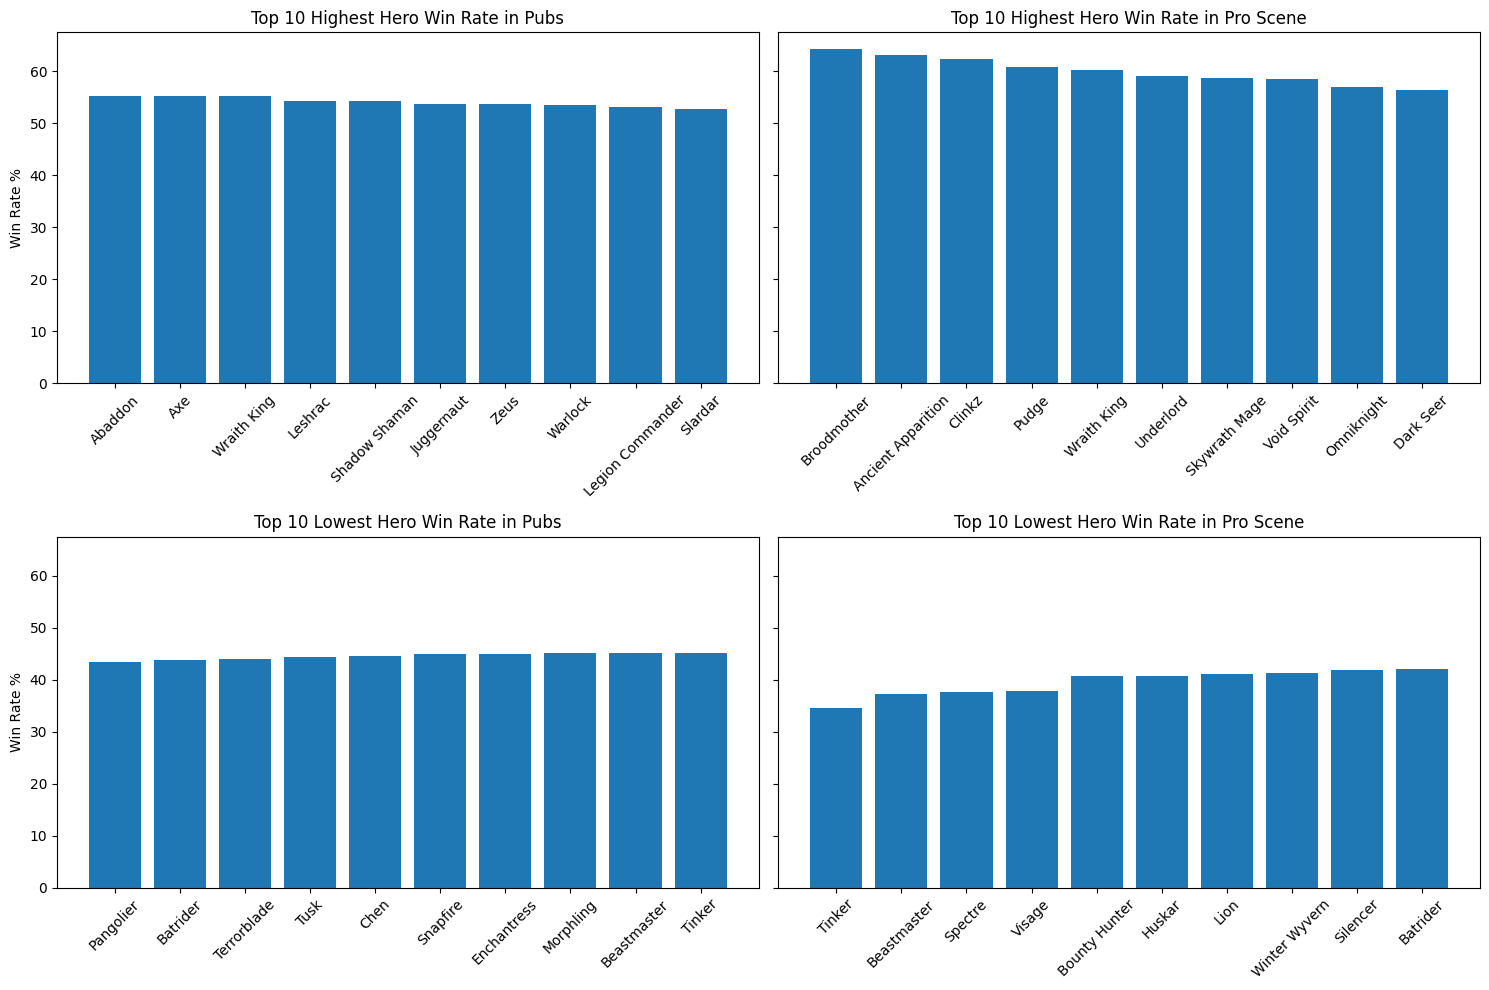

In [9]:
# top 10 heroes with highest win rate in pubs
pub_win_rate = main_hero_df[['id', 'localized_name', 'primary_attr', 'pub_pick', 'pub_win']].copy()
pub_win_rate['pub_win_rate'] = round(pub_win_rate['pub_win'] / pub_win_rate['pub_pick'] * 100, 2)
pub_win_rate_10_desc = pub_win_rate.sort_values('pub_win_rate', ascending=False).head(10)

# top 10 heroes with lowest win rate in pubs
pub_win_rate_10_asc = pub_win_rate.sort_values('pub_win_rate', ascending=True).head(10)

# top 10 heroes with highest win rate in pro scene
pro_win_rate = main_hero_df[['id', 'localized_name', 'primary_attr', 'pro_pick', 'pro_win']].copy()
pro_win_rate['pro_win_rate'] = round(pro_win_rate['pro_win'] / pro_win_rate['pro_pick'] * 100, 2)
pro_win_rate_10_desc = pro_win_rate.sort_values('pro_win_rate', ascending=False).head(10)

# top 10 heroes with lowest win rate in pro scene
pro_win_rate_10_asc = pro_win_rate.sort_values('pro_win_rate', ascending=True).head(10)

# set plot 2x2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)
ax[0,0].bar(x='localized_name', height='pub_win_rate', data=pub_win_rate_10_desc)
ax[0,1].bar(x='localized_name', height='pro_win_rate', data=pro_win_rate_10_desc)
ax[1,0].bar(x='localized_name', height='pub_win_rate', data=pub_win_rate_10_asc)
ax[1,1].bar(x='localized_name', height='pro_win_rate', data=pro_win_rate_10_asc)

# set y-axis label
ax[0,0].set_ylabel('Win Rate %')
ax[1,0].set_ylabel('Win Rate %')

# set title for the 4 plots
ax[0,0].set_title('Top 10 Highest Hero Win Rate in Pubs')
ax[0,1].set_title('Top 10 Highest Hero Win Rate in Pro Scene')
ax[1,0].set_title('Top 10 Lowest Hero Win Rate in Pubs')
ax[1,1].set_title('Top 10 Lowest Hero Win Rate in Pro Scene')

# adjust x-axis ticks
ax[0,0].tick_params(axis='x', labelrotation=45)
ax[0,1].tick_params(axis='x', labelrotation=45)
ax[1,0].tick_params(axis='x', labelrotation=45)
ax[1,1].tick_params(axis='x', labelrotation=45)

# show plot
plt.tight_layout()
plt.show()

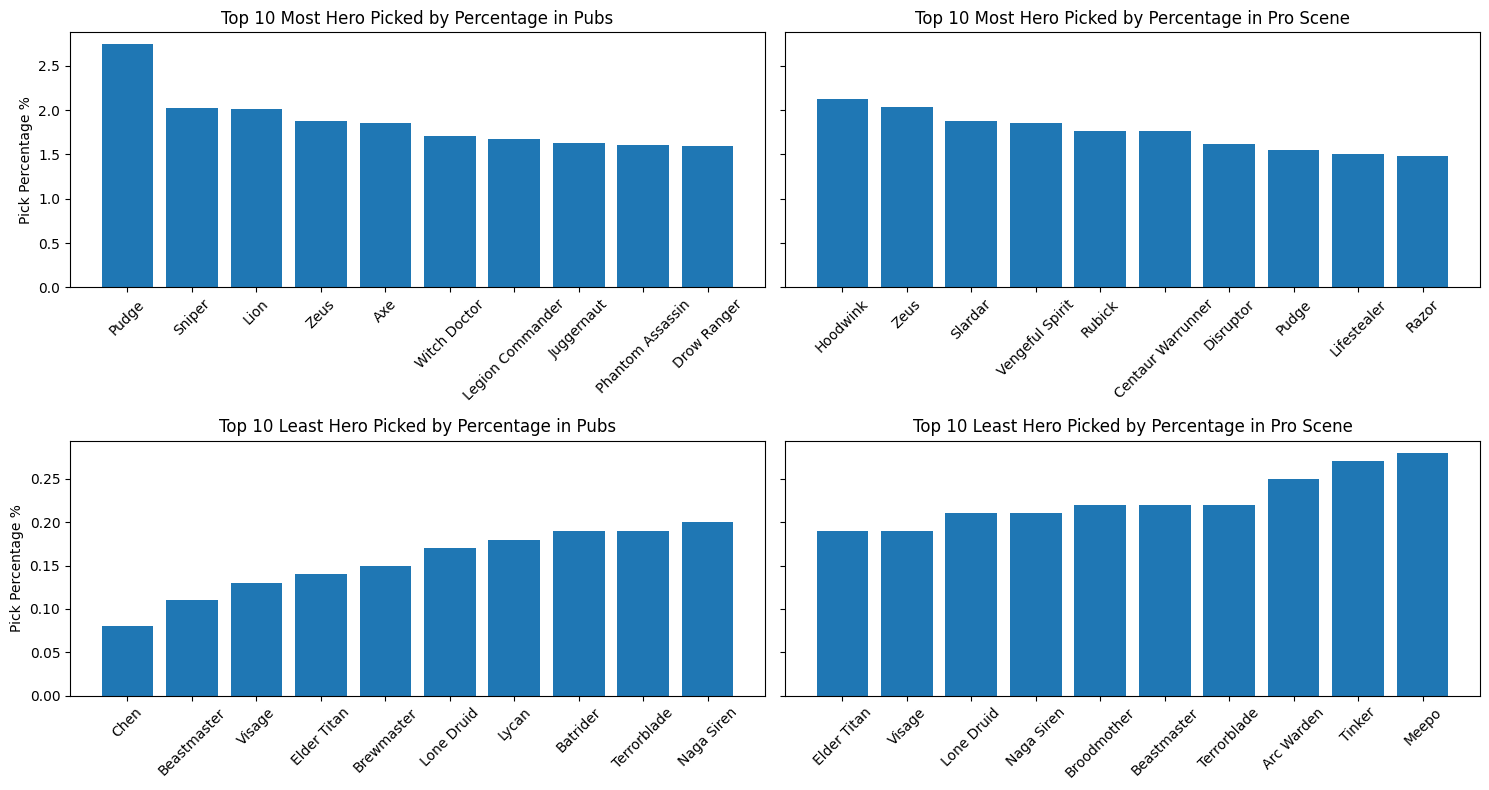

In [10]:
# top 10 most picked heroes in pubs by percentage
pub_hero_picks = main_hero_df[['id', 'localized_name', 'primary_attr', 'pub_pick']].copy()  
pub_hero_picks['all_pub_hero_pick_total'] = pub_hero_picks['pub_pick'].sum()
pub_hero_picks['pub_hero_pick_perc'] = round(pub_hero_picks['pub_pick'] / pub_hero_picks['all_pub_hero_pick_total'] * 100, 2) 
pub_hero_most_pick_10 = pub_hero_picks.sort_values('pub_hero_pick_perc', ascending=False).head(10)

# top 10 least picked heroes in pubs by percentage
pub_hero_least_pick_10 = pub_hero_picks.sort_values('pub_hero_pick_perc').head(10)

# top 10 most picked heroes in pro scene by percentage
pro_hero_picks = main_hero_df[['id', 'localized_name', 'primary_attr', 'pro_pick']].copy() 
pro_hero_picks['all_pro_hero_pick_total'] = pro_hero_picks['pro_pick'].sum()
pro_hero_picks['pro_hero_pick_perc'] = round(pro_hero_picks['pro_pick'] / pro_hero_picks['all_pro_hero_pick_total'] * 100, 2)
pro_hero_most_pick_10 = pro_hero_picks.sort_values('pro_hero_pick_perc', ascending=False).head(10)

# top 10 least picked heroes in pro scene by percentage
pro_hero_least_pick_10 = pro_hero_picks.sort_values('pro_hero_pick_perc').head(10)

# set plot 2x2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8), sharey='row')
ax[0,0].bar(x='localized_name', height='pub_hero_pick_perc', data=pub_hero_most_pick_10)
ax[0,1].bar(x='localized_name', height='pro_hero_pick_perc', data=pro_hero_most_pick_10)
ax[1,0].bar(x='localized_name', height='pub_hero_pick_perc', data=pub_hero_least_pick_10)
ax[1,1].bar(x='localized_name', height='pro_hero_pick_perc', data=pro_hero_least_pick_10)

# set y-axis label
ax[0,0].set_ylabel('Pick Percentage %')
ax[1,0].set_ylabel('Pick Percentage %')

# set title for the 4 plots
ax[0,0].set_title('Top 10 Most Hero Picked by Percentage in Pubs')
ax[0,1].set_title('Top 10 Most Hero Picked by Percentage in Pro Scene')
ax[1,0].set_title('Top 10 Least Hero Picked by Percentage in Pubs')
ax[1,1].set_title('Top 10 Least Hero Picked by Percentage in Pro Scene')

# adjust x-axis ticks
ax[0,0].tick_params(axis='x', labelrotation=45)
ax[0,1].tick_params(axis='x', labelrotation=45)
ax[1,0].tick_params(axis='x', labelrotation=45)
ax[1,1].tick_params(axis='x', labelrotation=45)

# show plot
plt.tight_layout()
plt.show()

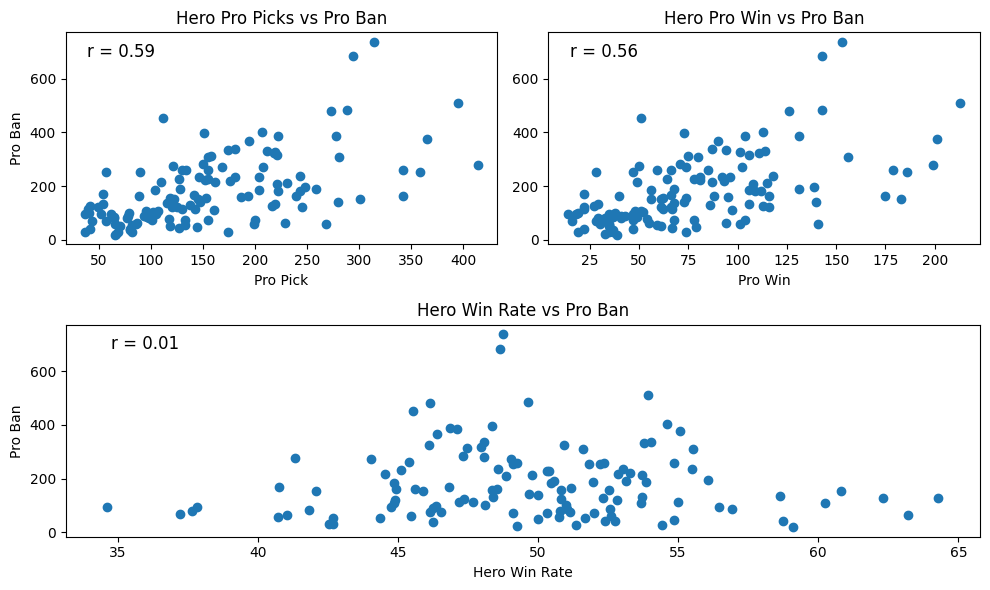

In [11]:
# in the pro scene, does a win rate of a hero have a correlation with bans?
pro_win_ban = main_hero_df[['id', 'localized_name', 'primary_attr', 'pro_pick', 'pro_win', 'pro_ban']].copy()
pro_win_ban['hero_win_rate'] = round(pro_win_ban['pro_win'] / pro_win_ban['pro_pick'] * 100, 2)

# plot scatter plot
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(10, 6))

corr_ax1 = pro_win_ban['pro_pick'].corr(pro_win_ban['pro_ban'])
corr_ax2 = pro_win_ban['pro_win'].corr(pro_win_ban['pro_ban'])
corr_ax3 = pro_win_ban['hero_win_rate'].corr(pro_win_ban['pro_ban'])

# create a GridSpec object with 2 rows and 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1,:])

ax1.scatter(x='pro_pick', y='pro_ban', data=pro_win_ban)
ax2.scatter(x='pro_win', y='pro_ban', data=pro_win_ban)
ax3.scatter(x='hero_win_rate', y='pro_ban', data=pro_win_ban)

# add correlation numbers
ax1.text(0.05, 0.95, f'r = {corr_ax1:.2f}', transform=ax1.transAxes, fontsize=12,
         verticalalignment='top')
ax2.text(0.05, 0.95, f'r = {corr_ax2:.2f}', transform=ax2.transAxes, fontsize=12,
         verticalalignment='top')
ax3.text(0.05, 0.95, f'r = {corr_ax3:.2f}', transform=ax3.transAxes, fontsize=12,
         verticalalignment='top')

# set title for the 3 plots
ax1.set_title('Hero Pro Picks vs Pro Ban')
ax2.set_title('Hero Pro Win vs Pro Ban')
ax3.set_title('Hero Win Rate vs Pro Ban')

# label y-axis
ax1.set_ylabel('Pro Ban')
ax3.set_ylabel('Pro Ban')

# label x-axis
ax1.set_xlabel('Pro Pick')
ax2.set_xlabel('Pro Win')
ax3.set_xlabel('Hero Win Rate')

# display plot
plt.tight_layout()
plt.show()

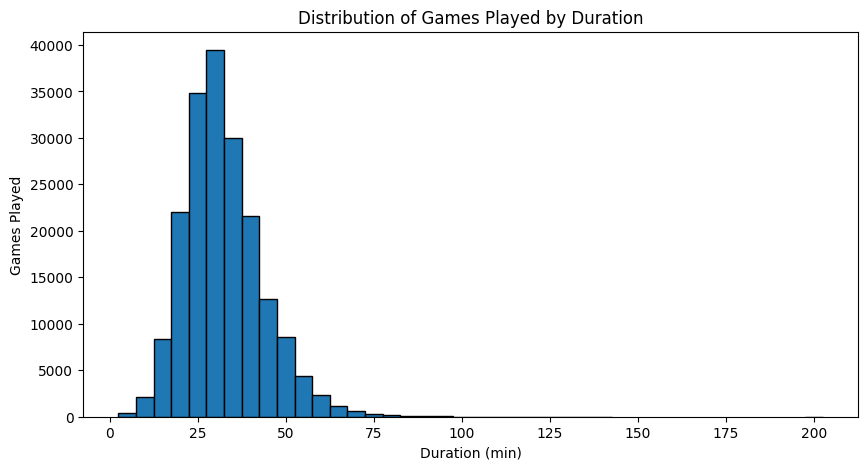

In [12]:
# see the distribution of games played by duration
hero_game_duration_merged = hero_game_duration_df.merge(hero_df, how='inner', left_on='hero_id',
                                                        right_on='id')
hero_game_duration_merged = hero_game_duration_merged[['hero_id', 'localized_name', 'games_played',
                                                       'wins', 'duration_bin']] \
                                    .rename(columns={'localized_name':'hero_name'})
hero_game_duration_merged['duration_min'] = hero_game_duration_merged['duration_bin'] / 60
game_durations = hero_game_duration_merged[['duration_min', 'games_played']].groupby('duration_min') \
                    .sum().reset_index()

game_durations['games_played_team'] = game_durations['games_played'] / 10

plt.figure(figsize=(10, 5))
plt.bar(x='duration_min', height='games_played_team', width=5, 
        edgecolor='black', data=game_durations)
plt.title('Distribution of Games Played by Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Games Played')
plt.show()

### Statistical Tests
1. Is there a significant difference between the base attributes (base_str, base_agi, base_int) against the primary attributes of heroes?
    - H<sub>0</sub>: The means of the base attributes are equal across the primary attribute.
    - H<sub>1</sub>: The means of the base attributes are not equal accross the primary attribute.

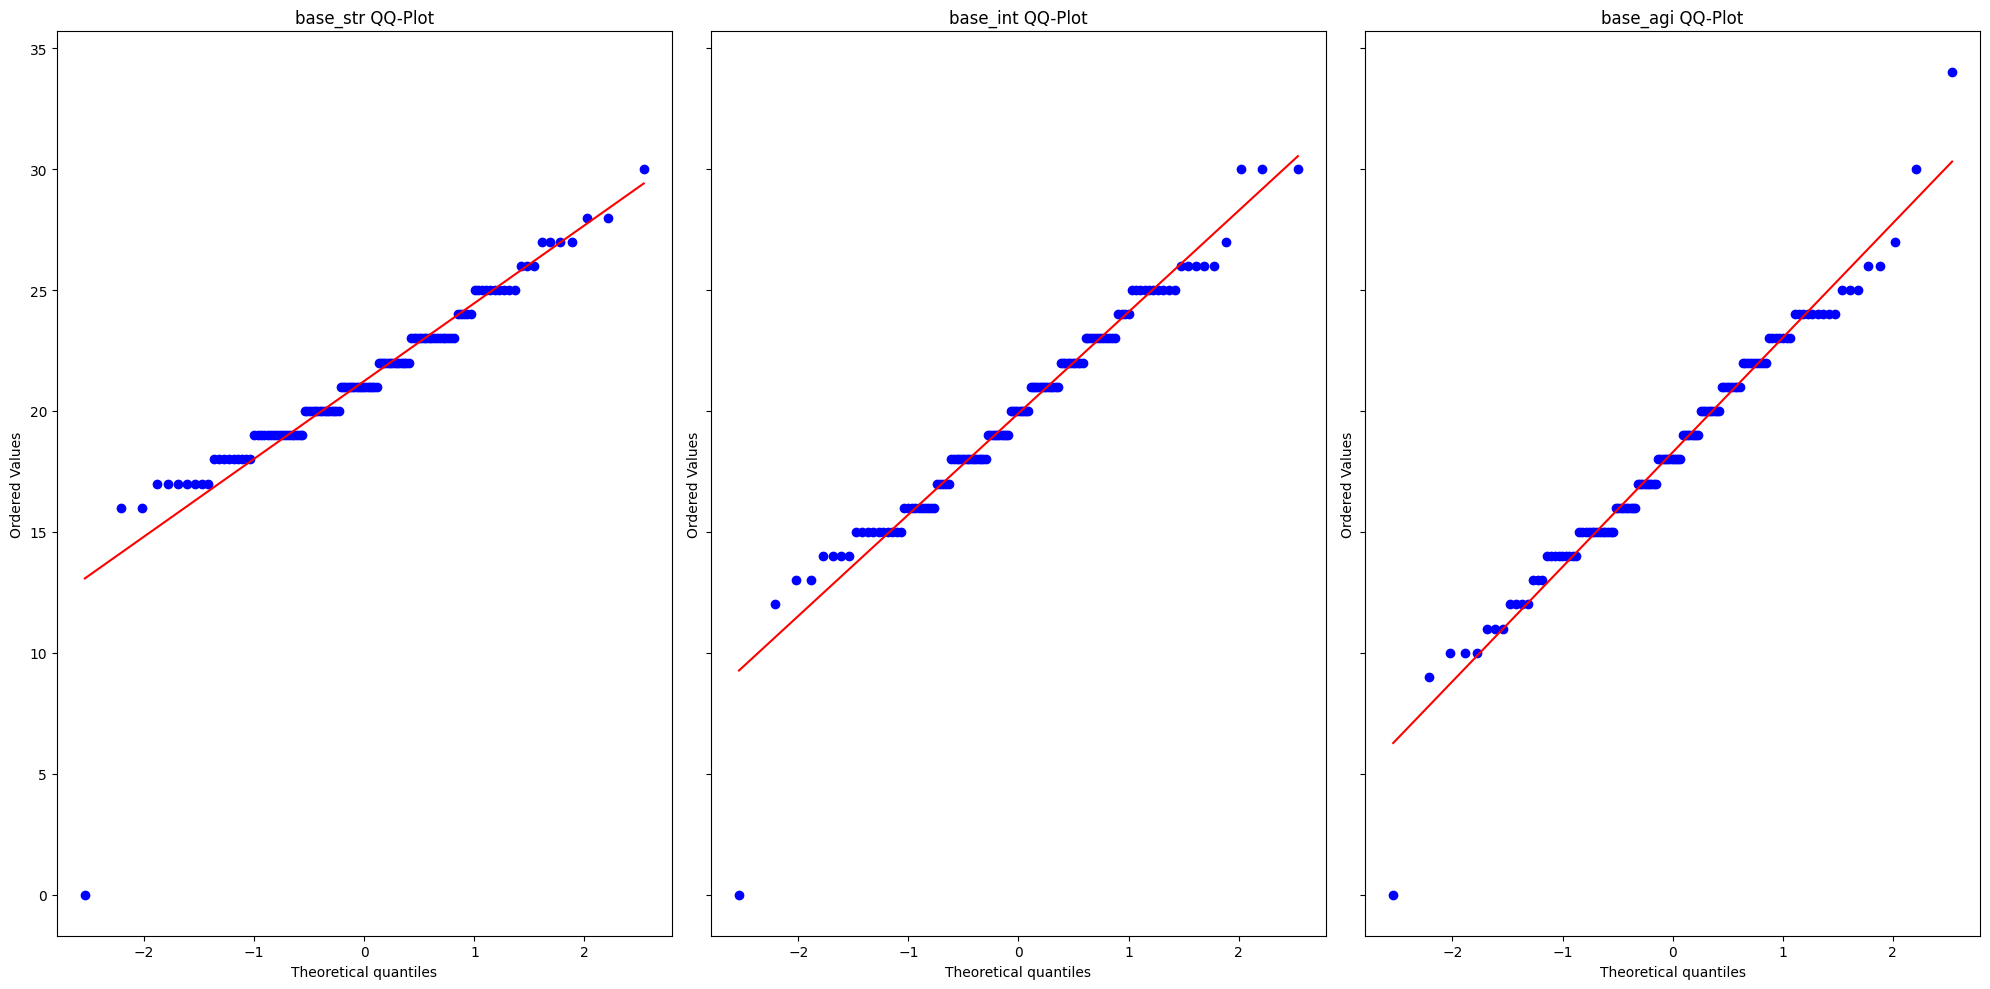

In [13]:
# see if these attributes are normally distributed, can check with q-q plot
import scipy.stats as stats

def plot_qq(data, ax):
    stats.probplot(data, dist='norm', plot=ax)
    ax.set_title(f'{data.name} QQ-Plot')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10), sharey=True)

plot_qq(main_hero_df.base_str, ax[0])
plot_qq(main_hero_df.base_int, ax[1])
plot_qq(main_hero_df.base_agi, ax[2])

plt.tight_layout()
plt.show()

In [14]:
# plot above can be assumed to be normally distributed
# perform MANOVA
from statsmodels.multivariate.manova import MANOVA 

data_stats = main_hero_df[['localized_name', 'primary_attr', 'base_str', 'base_int', 'base_agi']]

# create MANOVA model (dependent varialble ~ independent variable)
manova_result = MANOVA.from_formula('base_str + base_int + base_agi ~ primary_attr', data=data_stats)

# display result
print(manova_result.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0298 3.0000 118.0000 1280.1583 0.0000
         Pillai's trace  0.9702 3.0000 118.0000 1280.1583 0.0000
 Hotelling-Lawley trace 32.5464 3.0000 118.0000 1280.1583 0.0000
    Roy's greatest root 32.5464 3.0000 118.0000 1280.1583 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
         primary_attr      Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.3551 9.0000 287.3316 16.9263 0.0000
            Pillai's trace 0.8080 9.0000 360.

In [15]:
# seems like there is a significant difference. now we need to look if there's a sig diff. individually using ANOVA
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

base_attributes = ['base_str', 'base_int', 'base_agi']

for attr in base_attributes:
    model = ols(f'{attr} ~ primary_attr', data=data_stats).fit()
    anova_result = anova_lm(model)
    print(f'ANOVA result for {attr.upper()}:\n\n {anova_result}\n\n')

ANOVA result for BASE_STR:

                  df       sum_sq     mean_sq          F        PR(>F)
primary_attr    3.0   410.484476  136.828159  15.875524  9.332443e-09
Residual      120.0  1034.257460    8.618812        NaN           NaN


ANOVA result for BASE_INT:

                  df       sum_sq     mean_sq          F        PR(>F)
primary_attr    3.0   746.907527  248.969176  20.214947  1.136152e-10
Residual      120.0  1477.931183   12.316093        NaN           NaN


ANOVA result for BASE_AGI:

                  df       sum_sq     mean_sq          F        PR(>F)
primary_attr    3.0   998.190591  332.730197  22.489902  1.269192e-11
Residual      120.0  1775.357796   14.794648        NaN           NaN




In [16]:
# perform post-hoc test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for attr in base_attributes:
    tukey = pairwise_tukeyhsd(data_stats[attr], data_stats['primary_attr'])
    print('Note: meandiff = group 2 - group 1')
    print(f'Tukey\'s HSD for {attr.upper()}:\n\n {tukey}\n\n')

Note: meandiff = group 2 - group 1
Tukey's HSD for BASE_STR:

 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   agi    all    1.871 0.0636 -0.0718 3.8138  False
   agi    int   0.4161 0.9454 -1.5428 2.3751  False
   agi    str   4.6099    0.0  2.6823 6.5375   True
   all    int  -1.4548 0.2191 -3.4138 0.5041  False
   all    str   2.7389 0.0018  0.8113 4.6665   True
   int    str   4.1938    0.0  2.2499 6.1376   True
---------------------------------------------------


Note: meandiff = group 2 - group 1
Tukey's HSD for BASE_INT:

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   agi    all   1.6774 0.2413  -0.645  3.9999  False
   agi    int   5.5785    0.0  3.2368  7.9202   True
   agi    str  -0.8548 0.7687 -3.1591  1.4494  False
   all    int   3.9011 0.0002  1.5

Conclusion: Heroes with a specific primary attribute tend to have a higher base attribute related to their primary attribute.(e.g. strength heroes tend to have higher base_str, agility heroes tend to have higher base_agi, etc).

2. Is there a signifcant difference between base_health_regen and base_mana_regen against the primary attributes of heroes?
   - For base_health_regen:
       - H<sub>0</sub>: The mean of base health is equal across primary attributes.
       - H<sub>1</sub>: The mean of base health is not equal across primary attributes.
   - For base_mana_regen:
       - H<sub>0</sub>: The mean of base mana is equal across primary attributes.
       - H<sub>1</sub>: The mean of base mana is not equal across primary attributes.

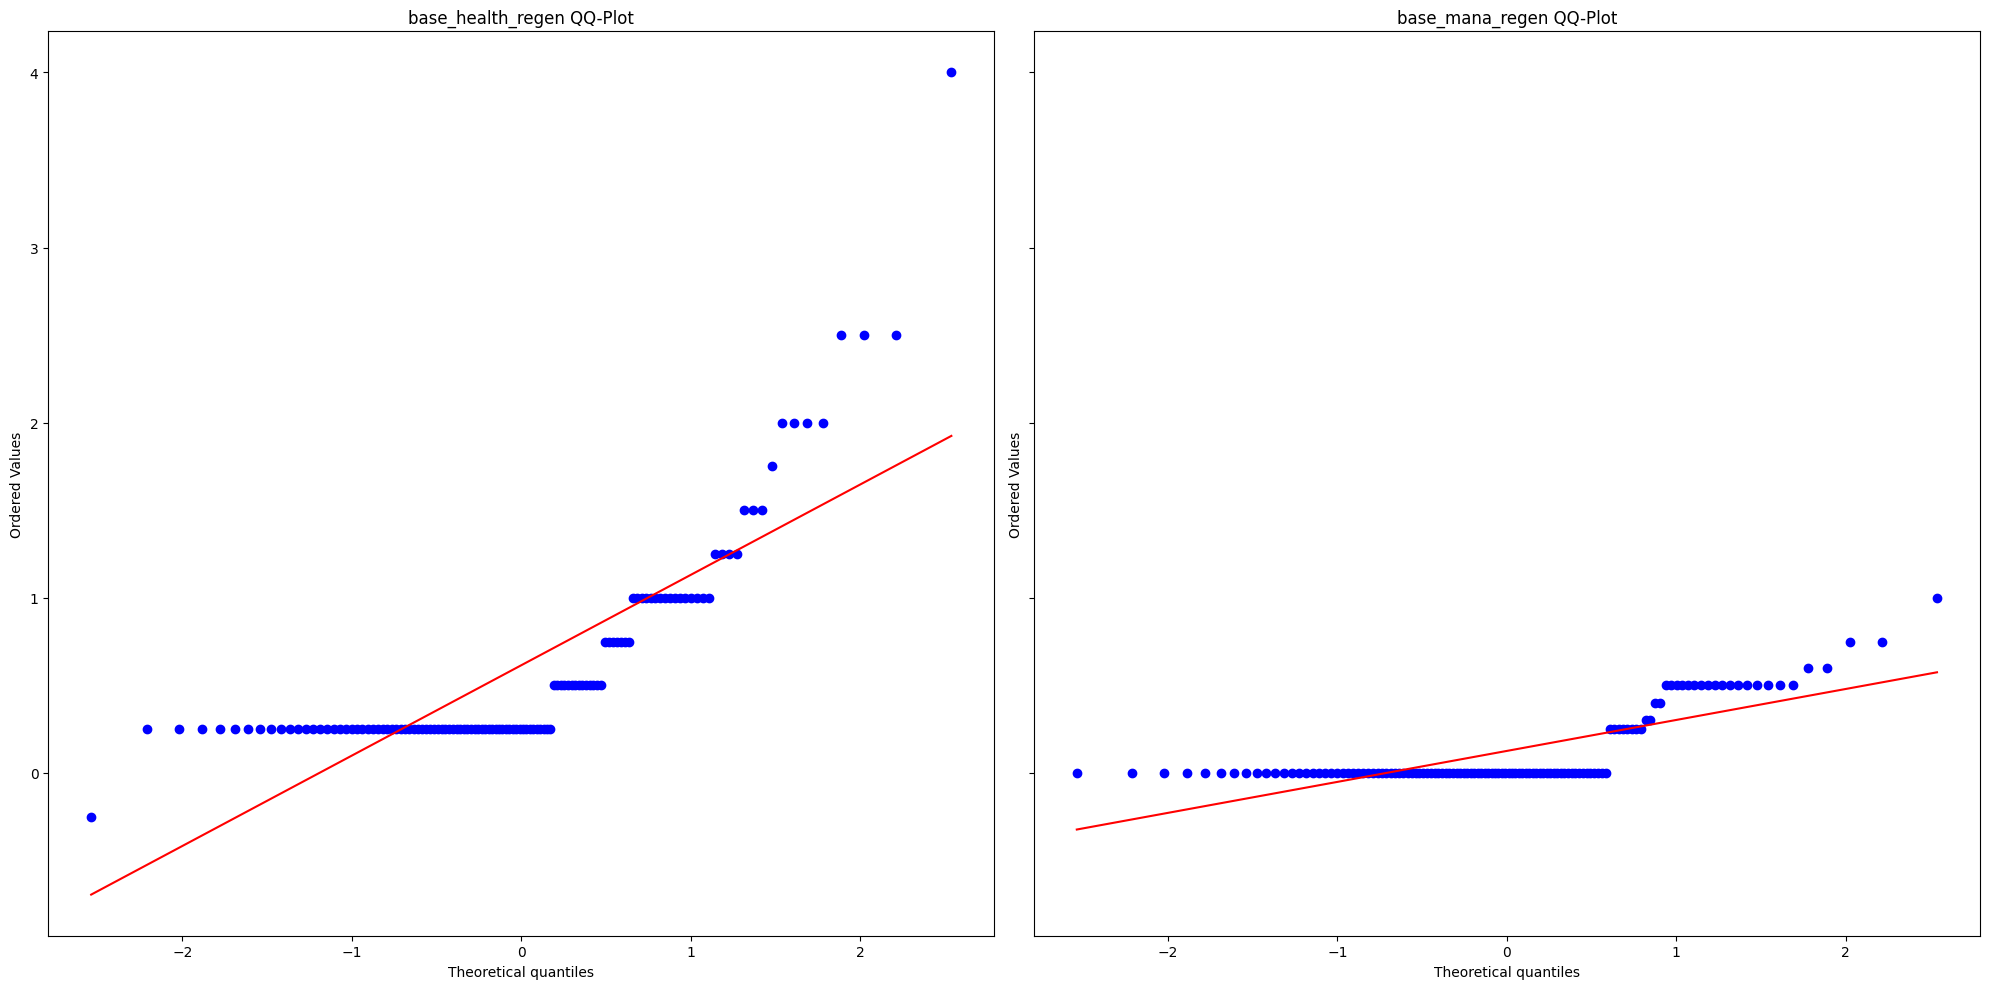

In [17]:
# do the same test between base_hp_regen and base_mana_regen
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

plot_qq(main_hero_df.base_health_regen, ax[0])
plot_qq(main_hero_df.base_mana_regen, ax[1])

plt.tight_layout()
plt.show()

In [18]:
# conduct non-parametric test because the normality test for the dependent variables are not normally distributed
import pingouin as pg

data_stats = main_hero_df[['localized_name', 'primary_attr', 'base_health_regen', 'base_mana_regen']]
regen_attributes = ['base_health_regen', 'base_mana_regen']

for attr in regen_attributes:
    results = pg.kruskal(data=data_stats, dv=attr, between='primary_attr')
    print(f'Kruskal-Wallis Result for {attr.upper()}:\n {results}\n\n')

Kruskal-Wallis Result for BASE_HEALTH_REGEN:
                Source  ddof1          H     p-unc
Kruskal  primary_attr      3  12.566145  0.005675


Kruskal-Wallis Result for BASE_MANA_REGEN:
                Source  ddof1         H     p-unc
Kruskal  primary_attr      3  2.912978  0.405238




In [19]:
# proceed with post-hoc test for base_health_regen
import scikit_posthocs as sp

dunn_results = sp.posthoc_dunn(data_stats, val_col='base_health_regen', group_col='primary_attr', p_adjust='bonferroni')
print(f'Dunn Post-Hoc Results:\n {dunn_results}\n\n')

conover_results = sp.posthoc_conover(data_stats, val_col='base_health_regen', group_col='primary_attr', p_adjust='bonferroni')
print(f'Conover Post-Hoc Results:\n {conover_results}')

Dunn Post-Hoc Results:
           agi       all       int       str
agi  1.000000  0.817099  0.012483  1.000000
all  0.817099  1.000000  0.656798  0.957299
int  0.012483  0.656798  1.000000  0.015785
str  1.000000  0.957299  0.015785  1.000000


Conover Post-Hoc Results:
           agi       all       int       str
agi  1.000000  0.737828  0.010250  1.000000
all  0.737828  1.000000  0.586965  0.871186
int  0.010250  0.586965  1.000000  0.012949
str  1.000000  0.871186  0.012949  1.000000


Conclusion: While there is no significant difference for base_mana_regen and the primary attributes of heroes, there is a significant difference between base_health_regen and the primary attributes. Specifically between the intelligence-agility and intelligence-strength attribute pairs. Which means that intelligence heroes have a different base_health_regen than intelligence and strength heroes. However, to know by how much the difference is, further analysis are required.

3. Is there a significant difference between the base attributes (base_str, base_agi, base_int) against the roles (carry and support) of heroes?
    - H<sub>0</sub>: The means of the base attributes are equal across roles.
    - H<sub>1</sub>: The means of the base attributes are not equal accross roles.

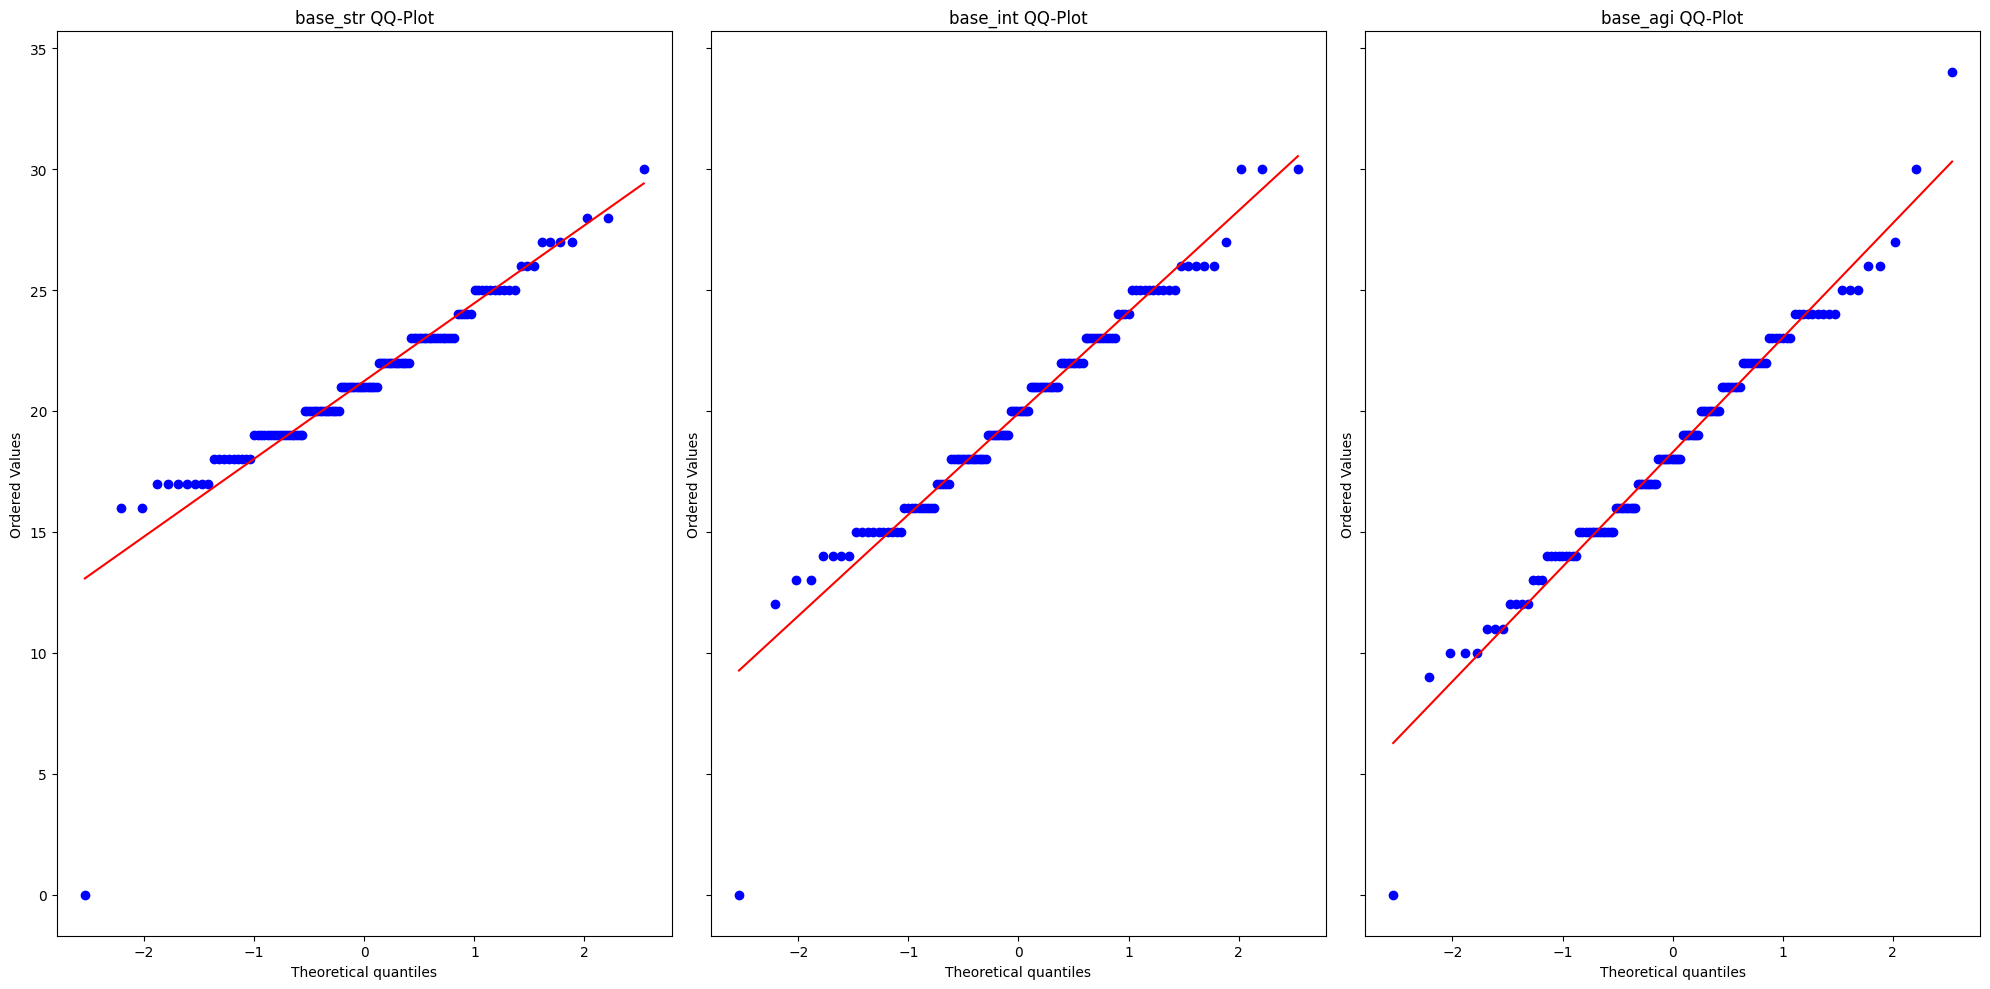

In [20]:
# plot qq plot of base attributes
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10), sharey=True)

plot_qq(main_hero_df.base_str, ax[0])
plot_qq(main_hero_df.base_int, ax[1])
plot_qq(main_hero_df.base_agi, ax[2])

plt.tight_layout()
plt.show()

In [21]:
# plot above can be assumed to be normally distributed
# perform MANOVA
from statsmodels.multivariate.manova import MANOVA 

mask = (main_hero_df['role_support'] == 1) & (main_hero_df['role_carry'] == 1)
carry_supp_df = main_hero_df.copy()
carry_supp_df['role'] = carry_supp_df['role_carry'].apply(lambda x: 'carry' if x == 1 else 'support')
carry_supp_df = carry_supp_df[['localized_name', 'role', 'base_str', 'base_int', 'base_agi']]

# to ensure independence between heroes in independent variables, remove heroes who are both carry and support
data_stats = carry_supp_df[~mask]

# # create MANOVA model (dependent varialble ~ independent variable)
manova_result = MANOVA.from_formula('base_str + base_int + base_agi ~ role', data=data_stats)

# # display result
print(manova_result.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0146 3.0000 109.0000 2460.4001 0.0000
         Pillai's trace  0.9854 3.0000 109.0000 2460.4001 0.0000
 Hotelling-Lawley trace 67.7174 3.0000 109.0000 2460.4001 0.0000
    Roy's greatest root 67.7174 3.0000 109.0000 2460.4001 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
             role          Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.8257 3.0000 109.0000  7.6695 0.0001
            Pillai's trace 0.1743 3.0000 109.

In [22]:
# seems like there is a significant difference. now we need to look if there's a sig diff. individually using ANOVA
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

base_attributes = ['base_str', 'base_int', 'base_agi']

for attr in base_attributes:
    model = ols(f'{attr} ~ role', data=data_stats).fit()
    anova_result = anova_lm(model)
    print(f'ANOVA result for {attr.upper()}:\n\n {anova_result}\n\n')

ANOVA result for BASE_STR:

              df       sum_sq    mean_sq         F    PR(>F)
role        1.0    14.785510  14.785510  1.176674  0.280385
Residual  111.0  1394.772013  12.565514       NaN       NaN


ANOVA result for BASE_INT:

              df       sum_sq     mean_sq         F    PR(>F)
role        1.0   115.487739  115.487739  6.637053  0.011301
Residual  111.0  1931.450314   17.400453       NaN       NaN


ANOVA result for BASE_AGI:

              df       sum_sq     mean_sq         F    PR(>F)
role        1.0   341.952538  341.952538  16.59273  0.000087
Residual  111.0  2287.551887   20.608576       NaN       NaN




In [23]:
# perform post-hoc test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for attr in base_attributes:
    tukey = pairwise_tukeyhsd(data_stats[attr], data_stats['role'])
    print('Note: meandiff = group 2 - group 1')
    print(f'Tukey\'s HSD for {attr.upper()}:\n\n {tukey}\n\n')

Note: meandiff = group 2 - group 1
Tukey's HSD for BASE_STR:

 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1  group2 meandiff p-adj   lower  upper reject
---------------------------------------------------
 carry support   0.7248 0.2804 -0.5993 2.049  False
---------------------------------------------------


Note: meandiff = group 2 - group 1
Tukey's HSD for BASE_INT:

 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1  group2 meandiff p-adj  lower  upper reject
--------------------------------------------------
 carry support   2.0258 0.0113 0.4676 3.584   True
--------------------------------------------------


Note: meandiff = group 2 - group 1
Tukey's HSD for BASE_AGI:

  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
 carry support  -3.4858 0.0001 -5.1816 -1.7901   True
-----------------------------------------------------




Conclusion: Based on the results, it seems that only base_agi and base_int between hero roles are statistically significant. On base_agi perspective, heroes who are a carry tend to have higher agility. On the other hand, on base_int perspective, the opposite is true.

### ML Modelling
ML modelling: try to predict the primary attribute of heroes based on their stats and roles
1. supervised ML (classification)

Note: 
- Developing a predictive model might not be the best using this dataset because of the limited number of heroes in the game (~100). But I'm doing it anyway for the sake of practice.
- Alternatively as an extension of the project, considering to get heroes from other MOBA games like League of Legends, Mobile Legends, etc. might be an option to get more data.


In [24]:
# take a look at the dataset
main_hero_df.head()

,id,name,localized_name,primary_attr,attack_type,legs,role_escape,role_pusher,role_disabler,role_initiator,...,divine_wins,immortal_picks,immortal_wins,turbo_picks,turbo_wins,pro_pick,pro_win,pro_ban,pub_pick,pub_win
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,2,1,0,0,0,...,13732,13198,6519,241581,123901,150,71,283,494559,250815
1,2,npc_dota_hero_axe,Axe,str,Melee,2,0,0,1,1,...,20406,16200,8660,373879,210043,281,156,309,664033,366899
2,3,npc_dota_hero_bane,Bane,all,Ranged,4,0,0,1,0,...,8276,12375,6425,104164,50573,221,106,316,192845,96812
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,2,0,0,1,1,...,4476,3494,1758,166841,80502,95,51,107,185626,93449
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,2,0,0,1,0,...,11910,11541,5884,270125,140765,268,141,59,453308,235028


In [25]:
main_hero_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 124 non-null    int64  
 1   name               124 non-null    object 
 2   localized_name     124 non-null    object 
 3   primary_attr       124 non-null    object 
 4   attack_type        124 non-null    object 
 5   legs               124 non-null    int64  
 6   role_escape        124 non-null    int64  
 7   role_pusher        124 non-null    int64  
 8   role_disabler      124 non-null    int64  
 9   role_initiator     124 non-null    int64  
 10  role_durable       124 non-null    int64  
 11  role_carry         124 non-null    int64  
 12  role_support       124 non-null    int64  
 13  role_nuker         124 non-null    int64  
 14  base_health        124 non-null    int64  
 15  base_health_regen  124 non-null    float64
 16  base_mana          124 non

In [26]:
# create dummy variables for categorical fields and remove unecessary fields
# we don't need the id, name, localized name because they are all unique and it doesn't have any meaning.
# remove turn_rate as there are over 50% of missing values.
# remove cm_enabled, base_health, base_mr because they all have the same value

model_df = main_hero_df.drop(columns=['id', 'name', 'localized_name', 'turn_rate', 'cm_enabled', 'base_health', 'base_mr'], axis=1)
model_df.columns

Index(['primary_attr', 'attack_type', 'legs', 'role_escape', 'role_pusher',
       'role_disabler', 'role_initiator', 'role_durable', 'role_carry',
       'role_support', 'role_nuker', 'base_health_regen', 'base_mana',
       'base_mana_regen', 'base_armor', 'base_attack_min', 'base_attack_max',
       'base_str', 'base_agi', 'base_int', 'str_gain', 'agi_gain', 'int_gain',
       'attack_range', 'projectile_speed', 'attack_rate', 'base_attack_time',
       'attack_point', 'move_speed', 'day_vision', 'night_vision',
       'herald_picks', 'herald_wins', 'guardian_picks', 'guardian_wins',
       'crusader_picks', 'crusader_wins', 'archon_picks', 'archon_wins',
       'legend_picks', 'legend_wins', 'ancient_picks', 'ancient_wins',
       'divine_picks', 'divine_wins', 'immortal_picks', 'immortal_wins',
       'turbo_picks', 'turbo_wins', 'pro_pick', 'pro_win', 'pro_ban',
       'pub_pick', 'pub_win'],
      dtype='object')

In [27]:
# turn attack_type into binary numbers. 1 if melee, 0 if ranged
model_df['attack_type'] = model_df['attack_type'].apply(lambda x: 1 if x == 'Melee' else 0)
model_df.attack_type.value_counts()

attack_type
0    64
1    60
Name: count, dtype: int64

In [28]:
# convert primary_attr to numbers
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
model_df['primary_attr'] = label_encoder.fit_transform(model_df['primary_attr'])

# get the mapping result
attr_map = {category: index for index, category in enumerate(label_encoder.classes_)}
attr_map

{'agi': 0, 'all': 1, 'int': 2, 'str': 3}

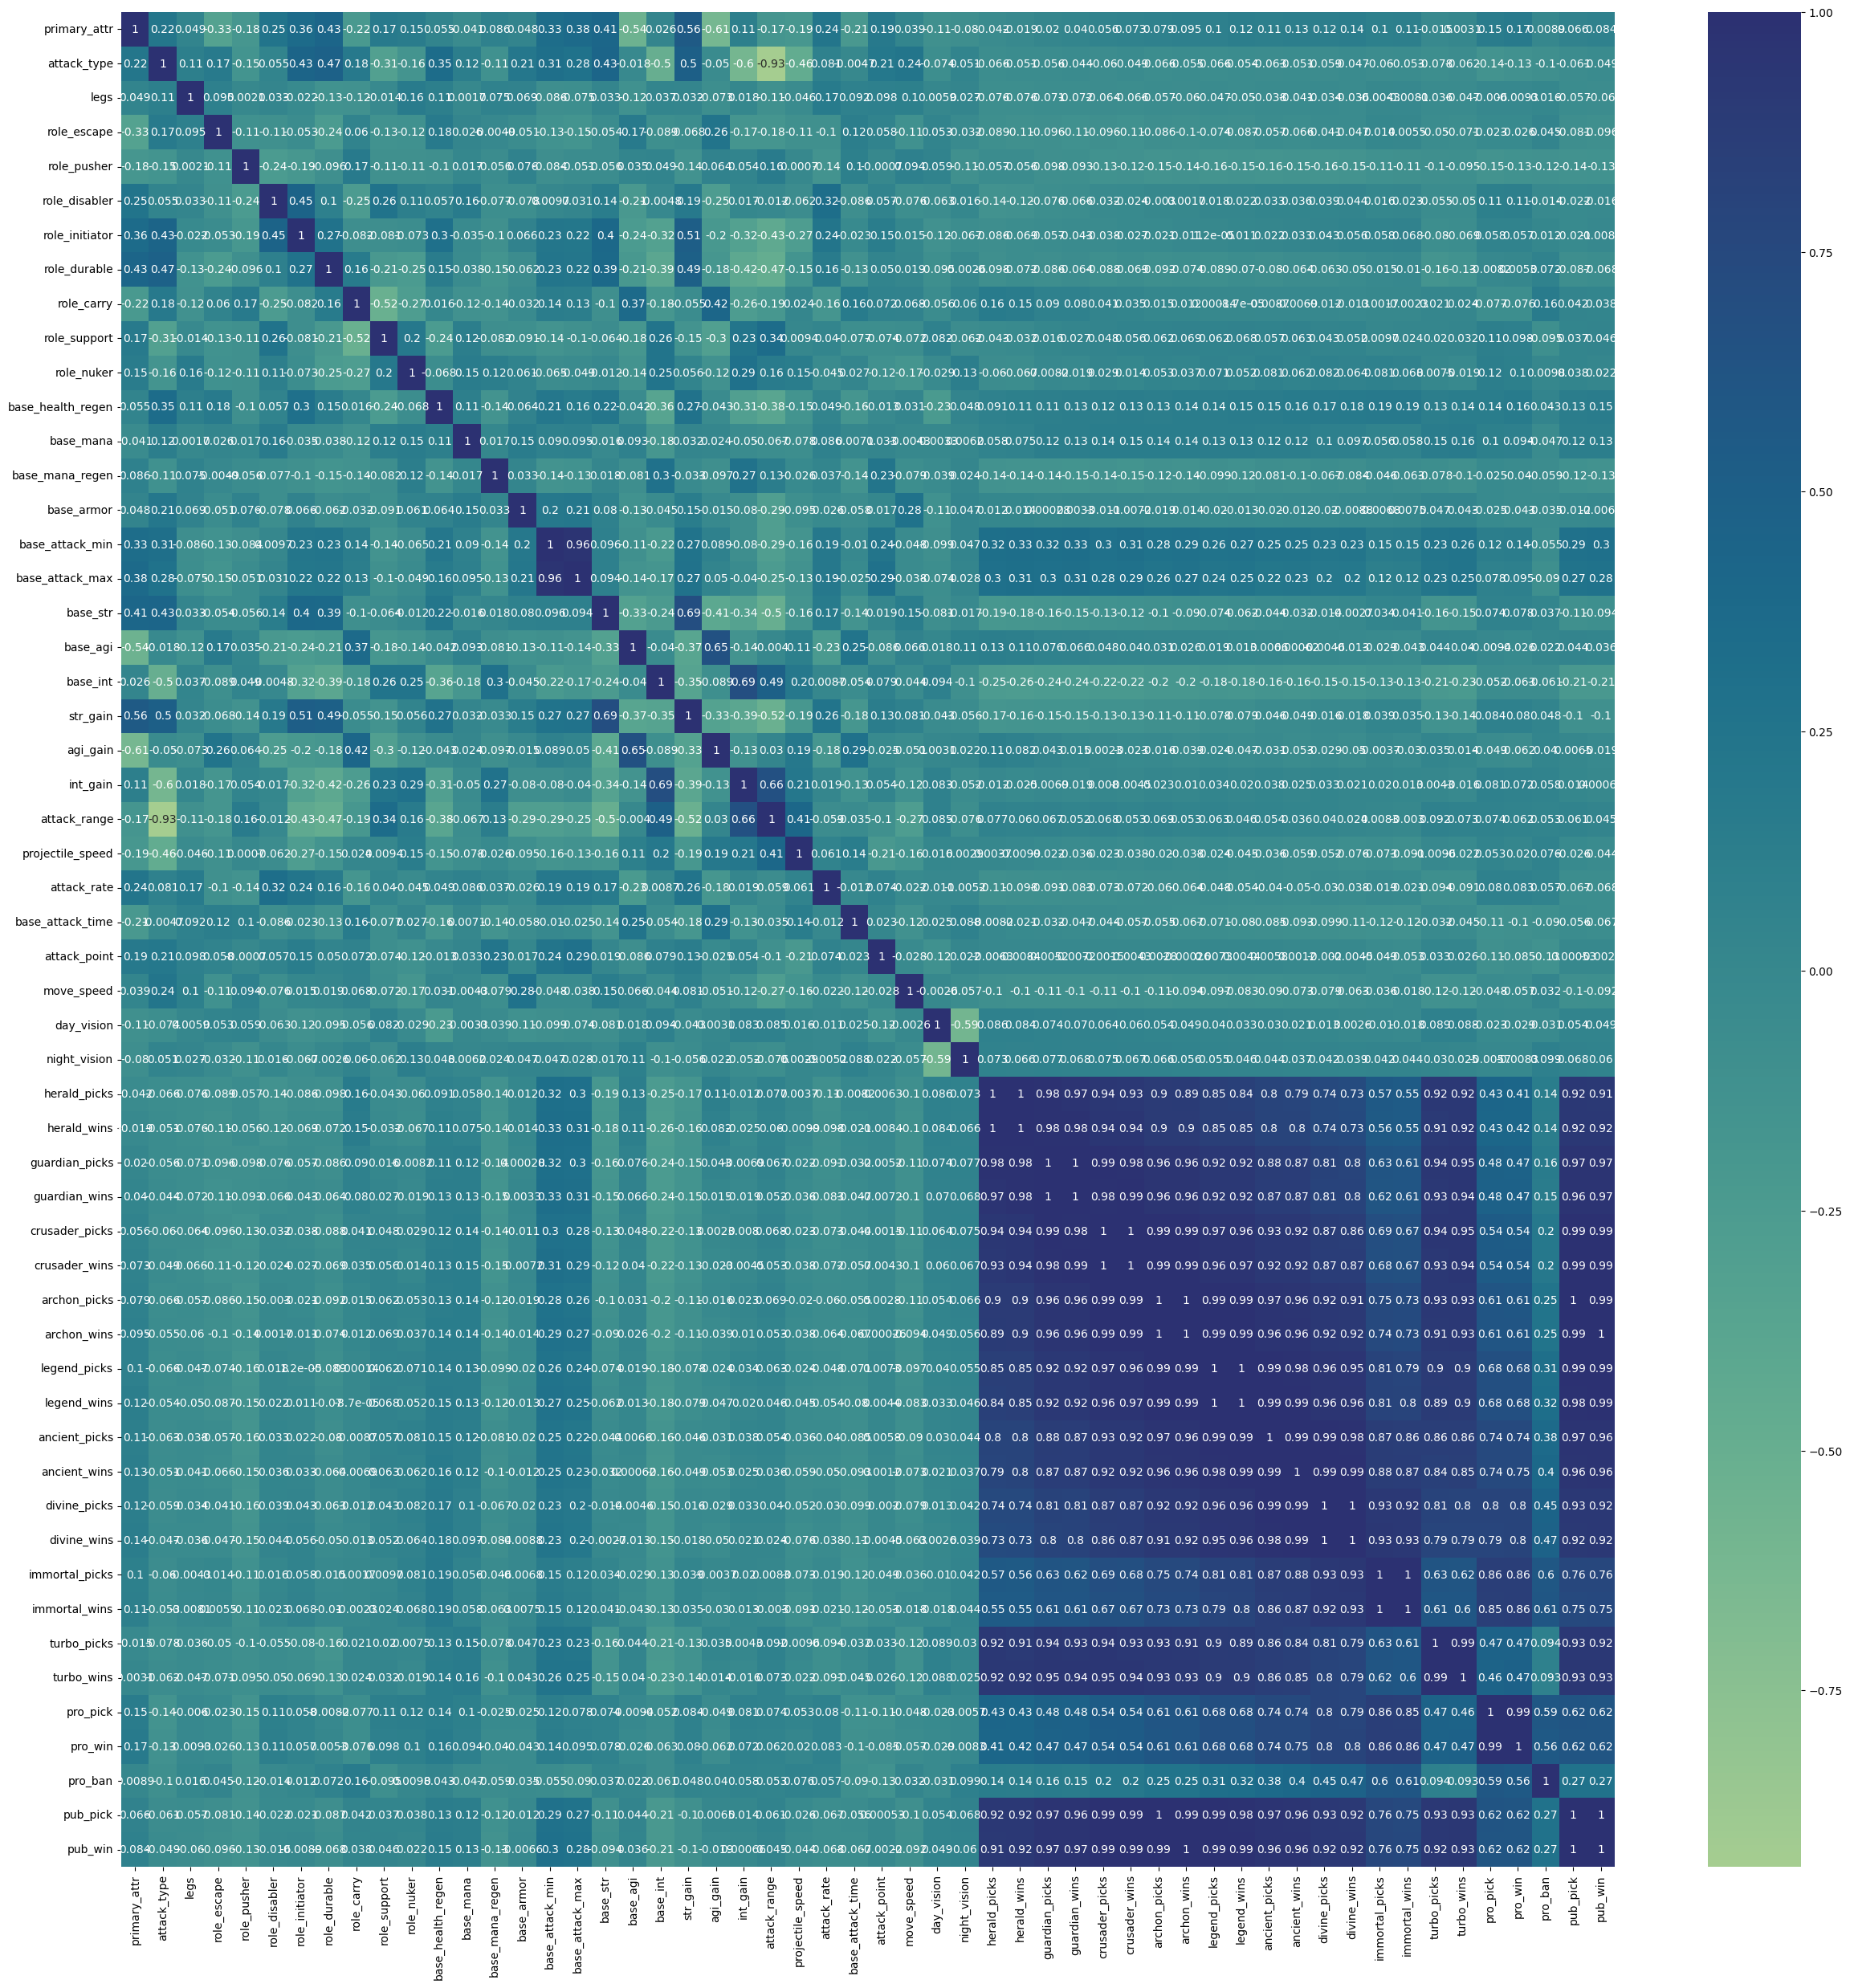

In [29]:
# check the correlation of the fields
plt.figure(figsize=(30,30))
corr_matrix = model_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.show()

In [30]:
# we appear to have some multicollinearity for fields related to wins and picks
cols_remove = ['herald_picks', 'herald_wins',
               'guardian_picks', 'guardian_wins',
               'crusader_picks', 'crusader_wins',
               'archon_picks', 'archon_wins',
               'legend_picks', 'legend_wins',
               'ancient_picks', 'ancient_wins',
               'divine_picks', 'divine_wins',
               'immortal_picks', 'immortal_wins',
               'turbo_picks', 'turbo_wins',
               'pro_pick', 'pro_win',
               'pub_pick', 'pub_win']

model_df = model_df.drop(columns=cols_remove, axis=1)

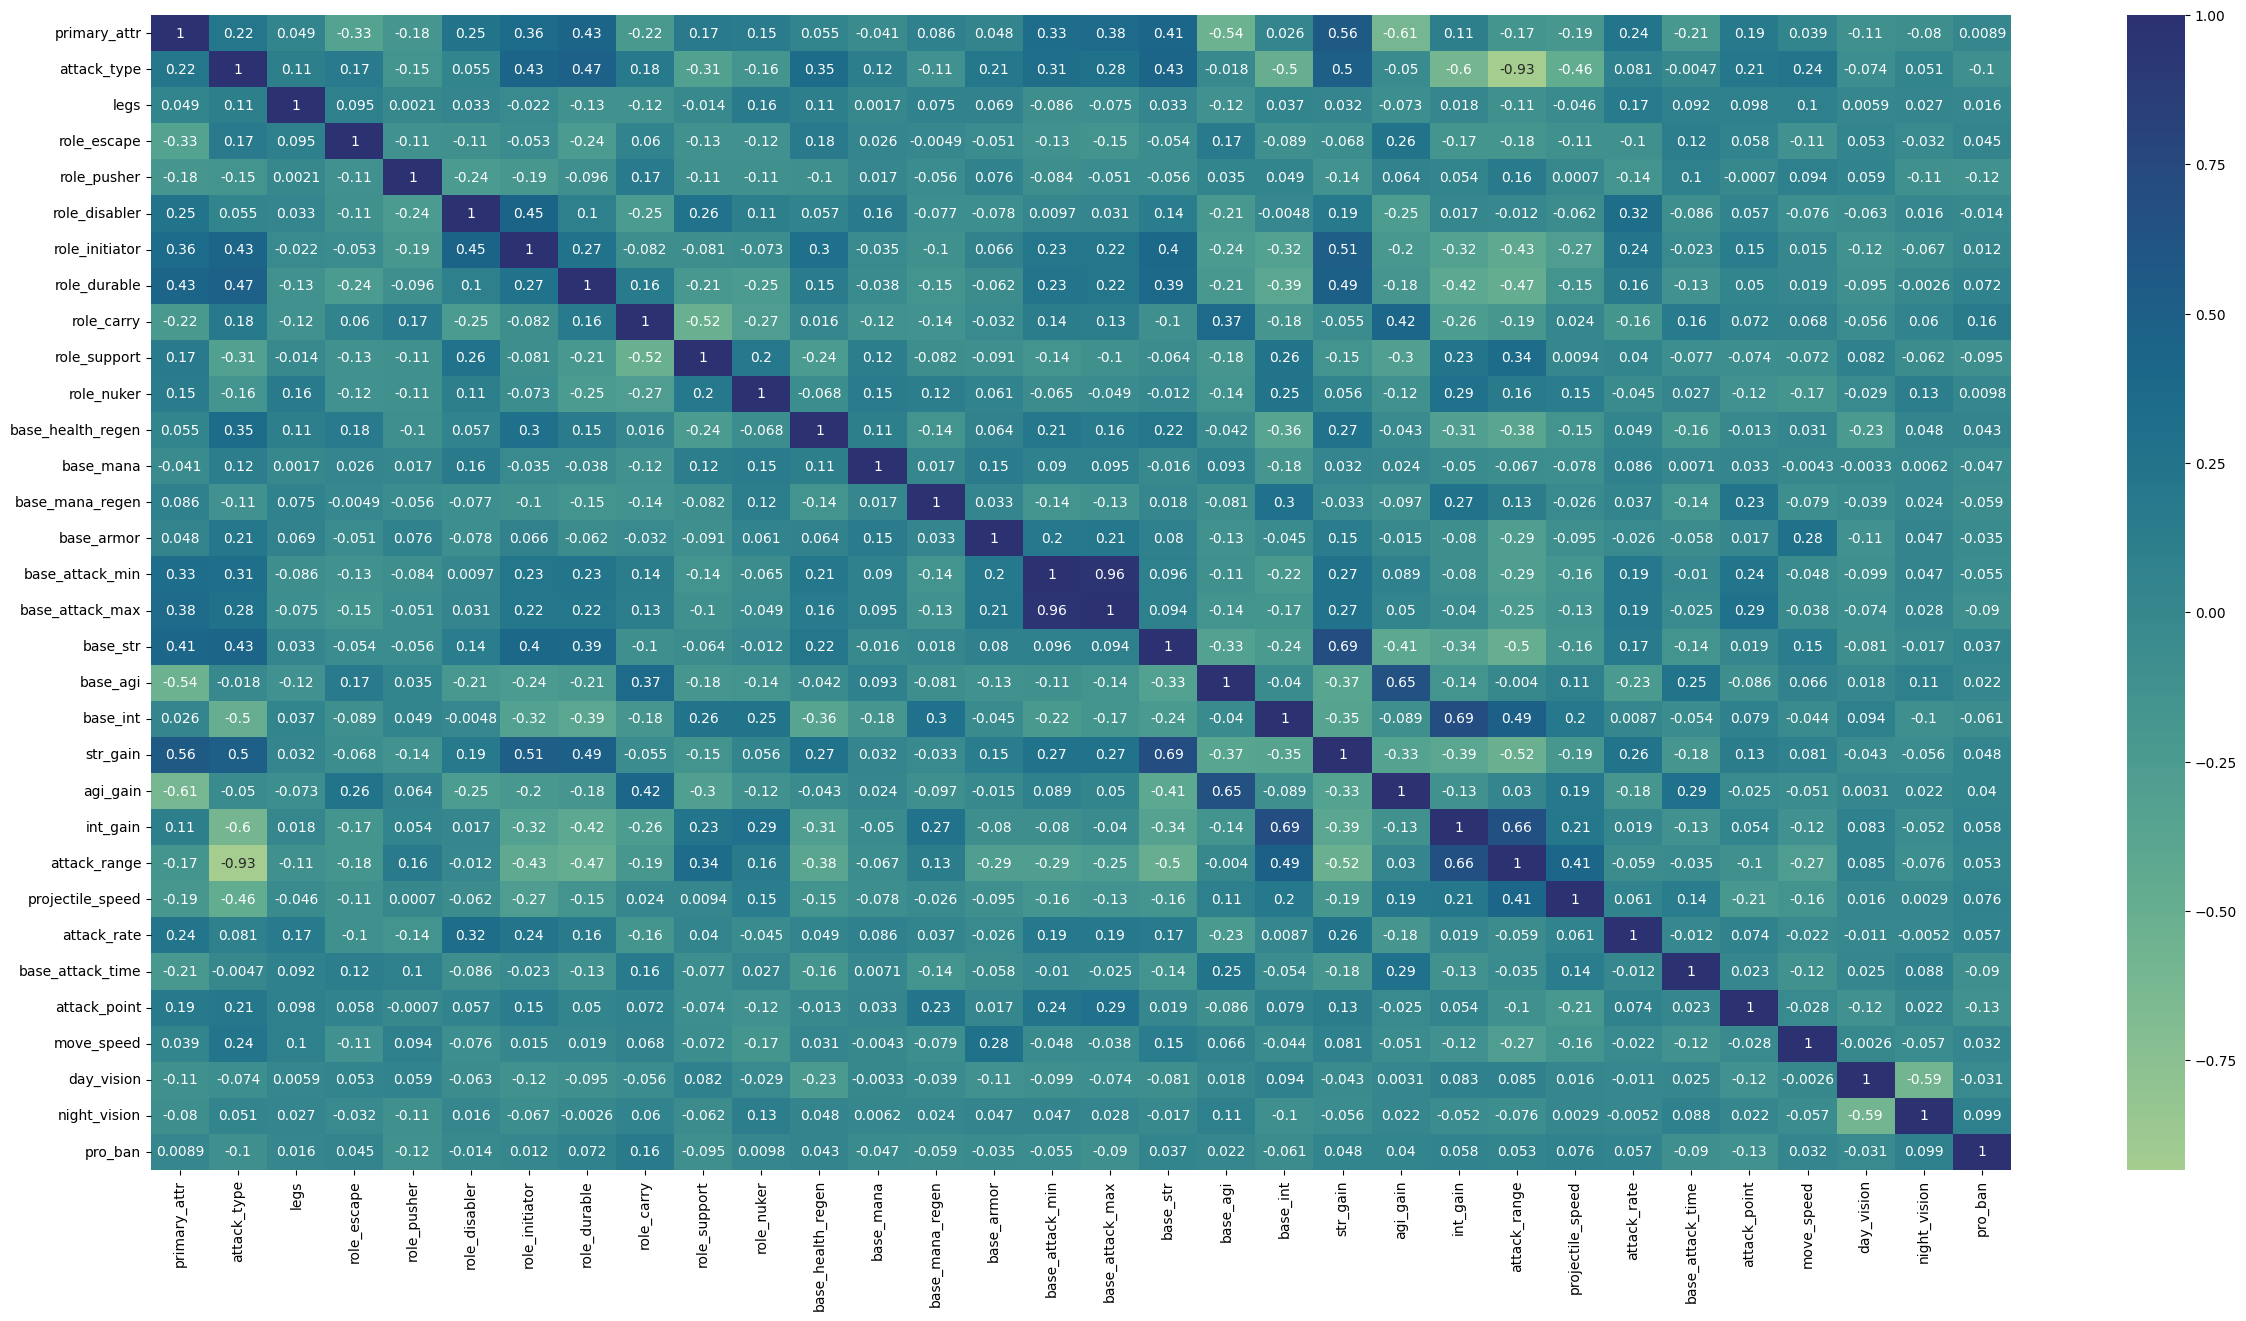

In [31]:
plt.figure(figsize=(30,15))
corr_matrix = model_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.show()

In [32]:
model_df.primary_attr.value_counts()

primary_attr
3    32
0    31
1    31
2    30
Name: count, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

X = model_df.drop('primary_attr', axis=1)
y = model_df['primary_attr']

In [34]:
# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (99, 31)
X_test: (25, 31)
y_train: (99,)
y_test: (25,)


In [35]:
# use pipeline because it's more convenient.
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', OneVsRestClassifier(LogisticRegression(random_state=42)))
])

# try to use the default parameters first
# Reference: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html
lr_params = {
    'lr__estimator__penalty': ['l2'], # default. need to have __estimator because we are wrapping lr to ovr classifier, else can directly lr__penalty.
    'lr__estimator__C': [1] # default
}

# setup grid search
lr_grid = GridSearchCV(lr_pipeline, param_grid=lr_params, cv=5, verbose=1)

# train model
lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        OneVsRestClassifier(estimator=LogisticRegression(random_state=42)))]),
             param_grid={'lr__estimator__C': [1],
                         'lr__estimator__penalty': ['l2']},
             verbose=1)

In [36]:
# evaluate
y_pred_lr  = lr_grid.predict(X_test)
report_lr = classification_report(y_test, y_pred_lr)
print(report_lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         3
           3       0.86      1.00      0.92         6

    accuracy                           0.96        25
   macro avg       0.96      0.98      0.97        25
weighted avg       0.97      0.96      0.96        25



In [37]:
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = Pipeline([
    ('scaler', StandardScaler()), # we don't really need this for decision tree actually
    ('dt', DecisionTreeClassifier(random_state=42))
])

# reference: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt_params = {
    'dt__min_samples_split': [2], # default
    'dt__min_samples_leaf': [1], # default
    'dt__max_depth': [None] # default
}

dt_grid = GridSearchCV(dt_pipeline, param_grid=dt_params, cv=5, verbose=1)

# train model
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dt__max_depth': [None], 'dt__min_samples_leaf': [1],
                         'dt__min_samples_split': [2]},
             verbose=1)

In [38]:
# evaluate
y_pred_dt = dt_grid.predict(X_test)
report_dt = classification_report(y_test, y_pred_dt)
print(report_dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



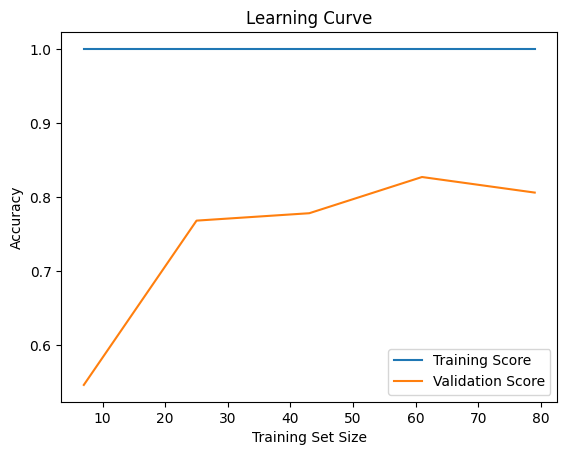

In [39]:
from sklearn.model_selection import learning_curve

# generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    dt_grid.best_estimator_, X_train, y_train, cv=5, scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, val_scores_mean, label='Validation Score')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [40]:
print(f'Tree Max Depth: {dt_grid.best_estimator_.named_steps["dt"].tree_.max_depth}')

Tree Max Depth: 5


In [41]:
dt_grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('dt', DecisionTreeClassifier(random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'dt': DecisionTreeClassifier(random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'dt__ccp_alpha': 0.0,
 'dt__class_weight': None,
 'dt__criterion': 'gini',
 'dt__max_depth': None,
 'dt__max_features': None,
 'dt__max_leaf_nodes': None,
 'dt__min_impurity_decrease': 0.0,
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__min_weight_fraction_leaf': 0.0,
 'dt__monotonic_cst': None,
 'dt__random_state': 42,
 'dt__splitter': 'best'}

In [42]:
dt_grid.best_estimator_.named_steps["dt"].tree_.n_leaves

np.int64(9)

In [43]:
dt_grid.best_estimator_.named_steps["dt"].tree_.node_count

17

In [ ]:
# TRY REDUCING THE MAX DEPTH

In [44]:
# check with random forest: this is probably overkill for extremely small datasets
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()), # we don't really need this for random forest actually
    ('rf', RandomForestClassifier(random_state=42))
])

# reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf_params = {
    'rf__n_estimators': [100], # default
    'rf__max_depth': [None], # default
    'rf__bootstrap': [True] # default
}

rf_grid = GridSearchCV(rf_pipeline, param_grid=rf_params, cv=5, verbose=1)

# train model
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__bootstrap': [True], 'rf__max_depth': [None],
                         'rf__n_estimators': [100]},
             verbose=1)

In [45]:
# evaluate
y_pred_rf = rf_grid.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

